<a href="https://colab.research.google.com/github/victoriaPaez/MujeresDigitales2021/blob/main/Modelo_KNN_Analisis_del_cliente_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datos 
**Clientes**
*   CustomerID: Identificador único del cliente
*   BirthDate: Fecha de nacimiento del cliente
*   Age: Edad del cliente
*   MaritalStatus: Estado civil del cliente
*   TotalChildren: Número de hijos que tiene
*   YearlyIncome: Ingreso familiar anual
*   Gender: Genero
*   Education: Nivel de educación del cliente
*   Occupation: Ocupación del cliente
*   HomeOwnerFlag: Si es dueño de casa propia
*   NumberCarsOwned: Numero de autos que posee el cliente

**Compañia**


*   TotalAmount: Cantidad total invertida
*   BikePurchase: Compra de Bicicletas
*   Country: Ciudad
*   CountryRegionCode: Código del país
*   Group: Grupo
*   PersonType: Tipo de persona
*   DateFirstPurchase: Fecha de la primera compra
*   Yearpurchase: Año de la primera compra
*   Monthpurchase: mes de la primera compra
*   Daypurchase: Dia de la primera compra
*   PersonID: ID persona

In [1]:
from pathlib import Path
import pandas as pd
import pandas_profiling
import numpy as np
import scipy as sc
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# **Examinamos los datos**

In [5]:
df = pd.read_csv("GastoClientesIN_adventureworks.csv", sep=";",index_col="CustomerID")

In [6]:
#analisis exploratorio de los datos

In [7]:
df.head()

,TotalAmount,BikePurchase,Country,CountryRegionCode,Group,PersonID,PersonType,DateFirstPurchase,yearpurchase,monthpurchase,daypurchase,BirthDate,Age,MaritalStatus,YearlyIncome,Gender,TotalChildren,Education,Occupation,HomeOwnerFlag,NumberCarsOwned
CustomerID,,,,,,,,,,,,,,,,,,,,,
11012,"81,26",0,Northwest,US,North America,11663,IN,2003-09-17 00:00:00.000,2003,9,17,1968-01-18 00:00:00.000,53,M,75001-100000,F,2,Bachelors,Management,1,2
11013,"113,96",0,Northwest,US,North America,13873,IN,2003-10-15 00:00:00.000,2003,10,15,1968-08-06 00:00:00.000,53,M,75001-100000,M,2,Bachelors,Management,1,3
11014,"138,45",0,Northwest,US,North America,2868,IN,2003-09-24 00:00:00.000,2003,9,24,1968-05-09 00:00:00.000,53,S,75001-100000,F,3,Bachelors,Management,0,3
11019,"882,7",0,Canada,CA,North America,5132,IN,2003-08-16 00:00:00.000,2003,8,16,1978-03-07 00:00:00.000,43,S,25001-50000,M,0,High School,Skilled Manual,0,2
11023,"122,24",0,Southwest,US,North America,4373,IN,2003-08-21 00:00:00.000,2003,8,21,1978-10-11 00:00:00.000,43,M,25001-50000,M,0,Partial College,Skilled Manual,1,1


In [8]:
df.shape

(18484, 21)

In [9]:
df.columns.values

array(['TotalAmount', 'BikePurchase', 'Country', 'CountryRegionCode',
       'Group', 'PersonID', 'PersonType', 'DateFirstPurchase',
       'yearpurchase', 'monthpurchase', 'daypurchase', 'BirthDate', 'Age',
       'MaritalStatus', 'YearlyIncome', 'Gender', 'TotalChildren',
       'Education', 'Occupation', 'HomeOwnerFlag', 'NumberCarsOwned'],
      dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18484 entries, 11012 to 29483
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TotalAmount        18484 non-null  object
 1   BikePurchase       18484 non-null  int64 
 2   Country            18484 non-null  object
 3   CountryRegionCode  18484 non-null  object
 4   Group              18484 non-null  object
 5   PersonID           18484 non-null  int64 
 6   PersonType         18484 non-null  object
 7   DateFirstPurchase  18484 non-null  object
 8   yearpurchase       18484 non-null  int64 
 9   monthpurchase      18484 non-null  int64 
 10  daypurchase        18484 non-null  int64 
 11  BirthDate          18484 non-null  object
 12  Age                18484 non-null  int64 
 13  MaritalStatus      18484 non-null  object
 14  YearlyIncome       18484 non-null  object
 15  Gender             18484 non-null  object
 16  TotalChildren      18484 non-null  i

In [11]:
df.describe()

,BikePurchase,PersonID,yearpurchase,monthpurchase,daypurchase,Age,TotalChildren,HomeOwnerFlag,NumberCarsOwned
count,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,0.494049,11532.731660,2003.129463,6.550206,15.713590,59.420039,1.844352,0.676369,1.502705
std,0.499978,5340.939611,0.855116,3.464323,8.787437,11.249188,1.612408,0.467874,1.138394
min,0.000000,1699.000000,2001.000000,1.000000,1.000000,41.000000,0.000000,0.000000,0.000000
25%,0.000000,6914.750000,2003.000000,4.000000,8.000000,51.000000,0.000000,0.000000,1.000000
50%,0.000000,11535.500000,2003.000000,6.000000,16.000000,58.000000,2.000000,1.000000,2.000000
75%,1.000000,16156.250000,2004.000000,10.000000,23.000000,67.000000,3.000000,1.000000,2.000000
max,1.000000,20777.000000,2004.000000,12.000000,31.000000,111.000000,5.000000,1.000000,4.000000


In [12]:
df.nunique()

TotalAmount           4651
BikePurchase             2
Country                 10
CountryRegionCode        6
Group                    3
PersonID             18484
PersonType               1
DateFirstPurchase     1124
yearpurchase             4
monthpurchase           12
daypurchase             31
BirthDate             8252
Age                     70
MaritalStatus            2
YearlyIncome             5
Gender                   2
TotalChildren            6
Education                5
Occupation               5
HomeOwnerFlag            2
NumberCarsOwned          5
dtype: int64

In [13]:
df.dtypes

TotalAmount          object
BikePurchase          int64
Country              object
CountryRegionCode    object
Group                object
PersonID              int64
PersonType           object
DateFirstPurchase    object
yearpurchase          int64
monthpurchase         int64
daypurchase           int64
BirthDate            object
Age                   int64
MaritalStatus        object
YearlyIncome         object
Gender               object
TotalChildren         int64
Education            object
Occupation           object
HomeOwnerFlag         int64
NumberCarsOwned       int64
dtype: object

In [14]:
df['BirthDate']=pd.to_datetime(df['BirthDate'])
print('\n')
print(df.dtypes)



TotalAmount                  object
BikePurchase                  int64
Country                      object
CountryRegionCode            object
Group                        object
PersonID                      int64
PersonType                   object
DateFirstPurchase            object
yearpurchase                  int64
monthpurchase                 int64
daypurchase                   int64
BirthDate            datetime64[ns]
Age                           int64
MaritalStatus                object
YearlyIncome                 object
Gender                       object
TotalChildren                 int64
Education                    object
Occupation                   object
HomeOwnerFlag                 int64
NumberCarsOwned               int64
dtype: object


# **Analisi Exploratorio de los Datos**

como podemos observar PersonType tiene el mismo valor por lo que no tendra una mayor contibuicion por lo que debemos eliminarlo

In [15]:
df=df.drop(columns=["PersonType"],axis=1)
df.head()

,TotalAmount,BikePurchase,Country,CountryRegionCode,Group,PersonID,DateFirstPurchase,yearpurchase,monthpurchase,daypurchase,BirthDate,Age,MaritalStatus,YearlyIncome,Gender,TotalChildren,Education,Occupation,HomeOwnerFlag,NumberCarsOwned
CustomerID,,,,,,,,,,,,,,,,,,,,
11012,"81,26",0,Northwest,US,North America,11663,2003-09-17 00:00:00.000,2003,9,17,1968-01-18,53,M,75001-100000,F,2,Bachelors,Management,1,2
11013,"113,96",0,Northwest,US,North America,13873,2003-10-15 00:00:00.000,2003,10,15,1968-08-06,53,M,75001-100000,M,2,Bachelors,Management,1,3
11014,"138,45",0,Northwest,US,North America,2868,2003-09-24 00:00:00.000,2003,9,24,1968-05-09,53,S,75001-100000,F,3,Bachelors,Management,0,3
11019,"882,7",0,Canada,CA,North America,5132,2003-08-16 00:00:00.000,2003,8,16,1978-03-07,43,S,25001-50000,M,0,High School,Skilled Manual,0,2
11023,"122,24",0,Southwest,US,North America,4373,2003-08-21 00:00:00.000,2003,8,21,1978-10-11,43,M,25001-50000,M,0,Partial College,Skilled Manual,1,1


In [16]:
import datetime
df['YearBirthday'] = df['BirthDate'].dt.year 
df['Month'] = df['BirthDate'].dt.month 
df.head()

,TotalAmount,BikePurchase,Country,CountryRegionCode,Group,PersonID,DateFirstPurchase,yearpurchase,monthpurchase,daypurchase,BirthDate,Age,MaritalStatus,YearlyIncome,Gender,TotalChildren,Education,Occupation,HomeOwnerFlag,NumberCarsOwned,YearBirthday,Month
CustomerID,,,,,,,,,,,,,,,,,,,,,,
11012,"81,26",0,Northwest,US,North America,11663,2003-09-17 00:00:00.000,2003,9,17,1968-01-18,53,M,75001-100000,F,2,Bachelors,Management,1,2,1968,1
11013,"113,96",0,Northwest,US,North America,13873,2003-10-15 00:00:00.000,2003,10,15,1968-08-06,53,M,75001-100000,M,2,Bachelors,Management,1,3,1968,8
11014,"138,45",0,Northwest,US,North America,2868,2003-09-24 00:00:00.000,2003,9,24,1968-05-09,53,S,75001-100000,F,3,Bachelors,Management,0,3,1968,5
11019,"882,7",0,Canada,CA,North America,5132,2003-08-16 00:00:00.000,2003,8,16,1978-03-07,43,S,25001-50000,M,0,High School,Skilled Manual,0,2,1978,3
11023,"122,24",0,Southwest,US,North America,4373,2003-08-21 00:00:00.000,2003,8,21,1978-10-11,43,M,25001-50000,M,0,Partial College,Skilled Manual,1,1,1978,10


In [17]:
print(df.dtypes)

TotalAmount                  object
BikePurchase                  int64
Country                      object
CountryRegionCode            object
Group                        object
PersonID                      int64
DateFirstPurchase            object
yearpurchase                  int64
monthpurchase                 int64
daypurchase                   int64
BirthDate            datetime64[ns]
Age                           int64
MaritalStatus                object
YearlyIncome                 object
Gender                       object
TotalChildren                 int64
Education                    object
Occupation                   object
HomeOwnerFlag                 int64
NumberCarsOwned               int64
YearBirthday                  int64
Month                         int64
dtype: object


In [18]:
df['TotalAmount'] = df['TotalAmount'].str.replace(",", ".").astype(float)

In [19]:
print(df.dtypes)

TotalAmount                 float64
BikePurchase                  int64
Country                      object
CountryRegionCode            object
Group                        object
PersonID                      int64
DateFirstPurchase            object
yearpurchase                  int64
monthpurchase                 int64
daypurchase                   int64
BirthDate            datetime64[ns]
Age                           int64
MaritalStatus                object
YearlyIncome                 object
Gender                       object
TotalChildren                 int64
Education                    object
Occupation                   object
HomeOwnerFlag                 int64
NumberCarsOwned               int64
YearBirthday                  int64
Month                         int64
dtype: object


In [20]:
#seleccionamos los datos que necesitamos para hacer el modelo
dfn=df[['PersonID','Country','Gender','Education','Occupation','Age','MaritalStatus','TotalChildren','TotalAmount','BikePurchase','NumberCarsOwned']]
dfn

,PersonID,Country,Gender,Education,Occupation,Age,MaritalStatus,TotalChildren,TotalAmount,BikePurchase,NumberCarsOwned
CustomerID,,,,,,,,,,,
11012,11663,Northwest,F,Bachelors,Management,53,M,2,81.2600,0,2
11013,13873,Northwest,M,Bachelors,Management,53,M,2,113.9600,0,3
11014,2868,Northwest,F,Bachelors,Management,53,S,3,138.4500,0,3
11019,5132,Canada,M,High School,Skilled Manual,43,S,0,882.7000,0,2
11023,4373,Southwest,M,Partial College,Skilled Manual,43,M,0,122.2400,0,1
...,...,...,...,...,...,...,...,...,...,...,...
29479,4191,France,M,Graduate Degree,Clerical,63,M,1,2049.0982,1,0
29480,4472,United Kingdom,F,Graduate Degree,Clerical,61,S,3,2442.0300,1,0
29481,8168,Germany,M,Graduate Degree,Clerical,61,S,3,3374.9900,1,0


diagramas de caja para visualizar cada característica categórica no numérica



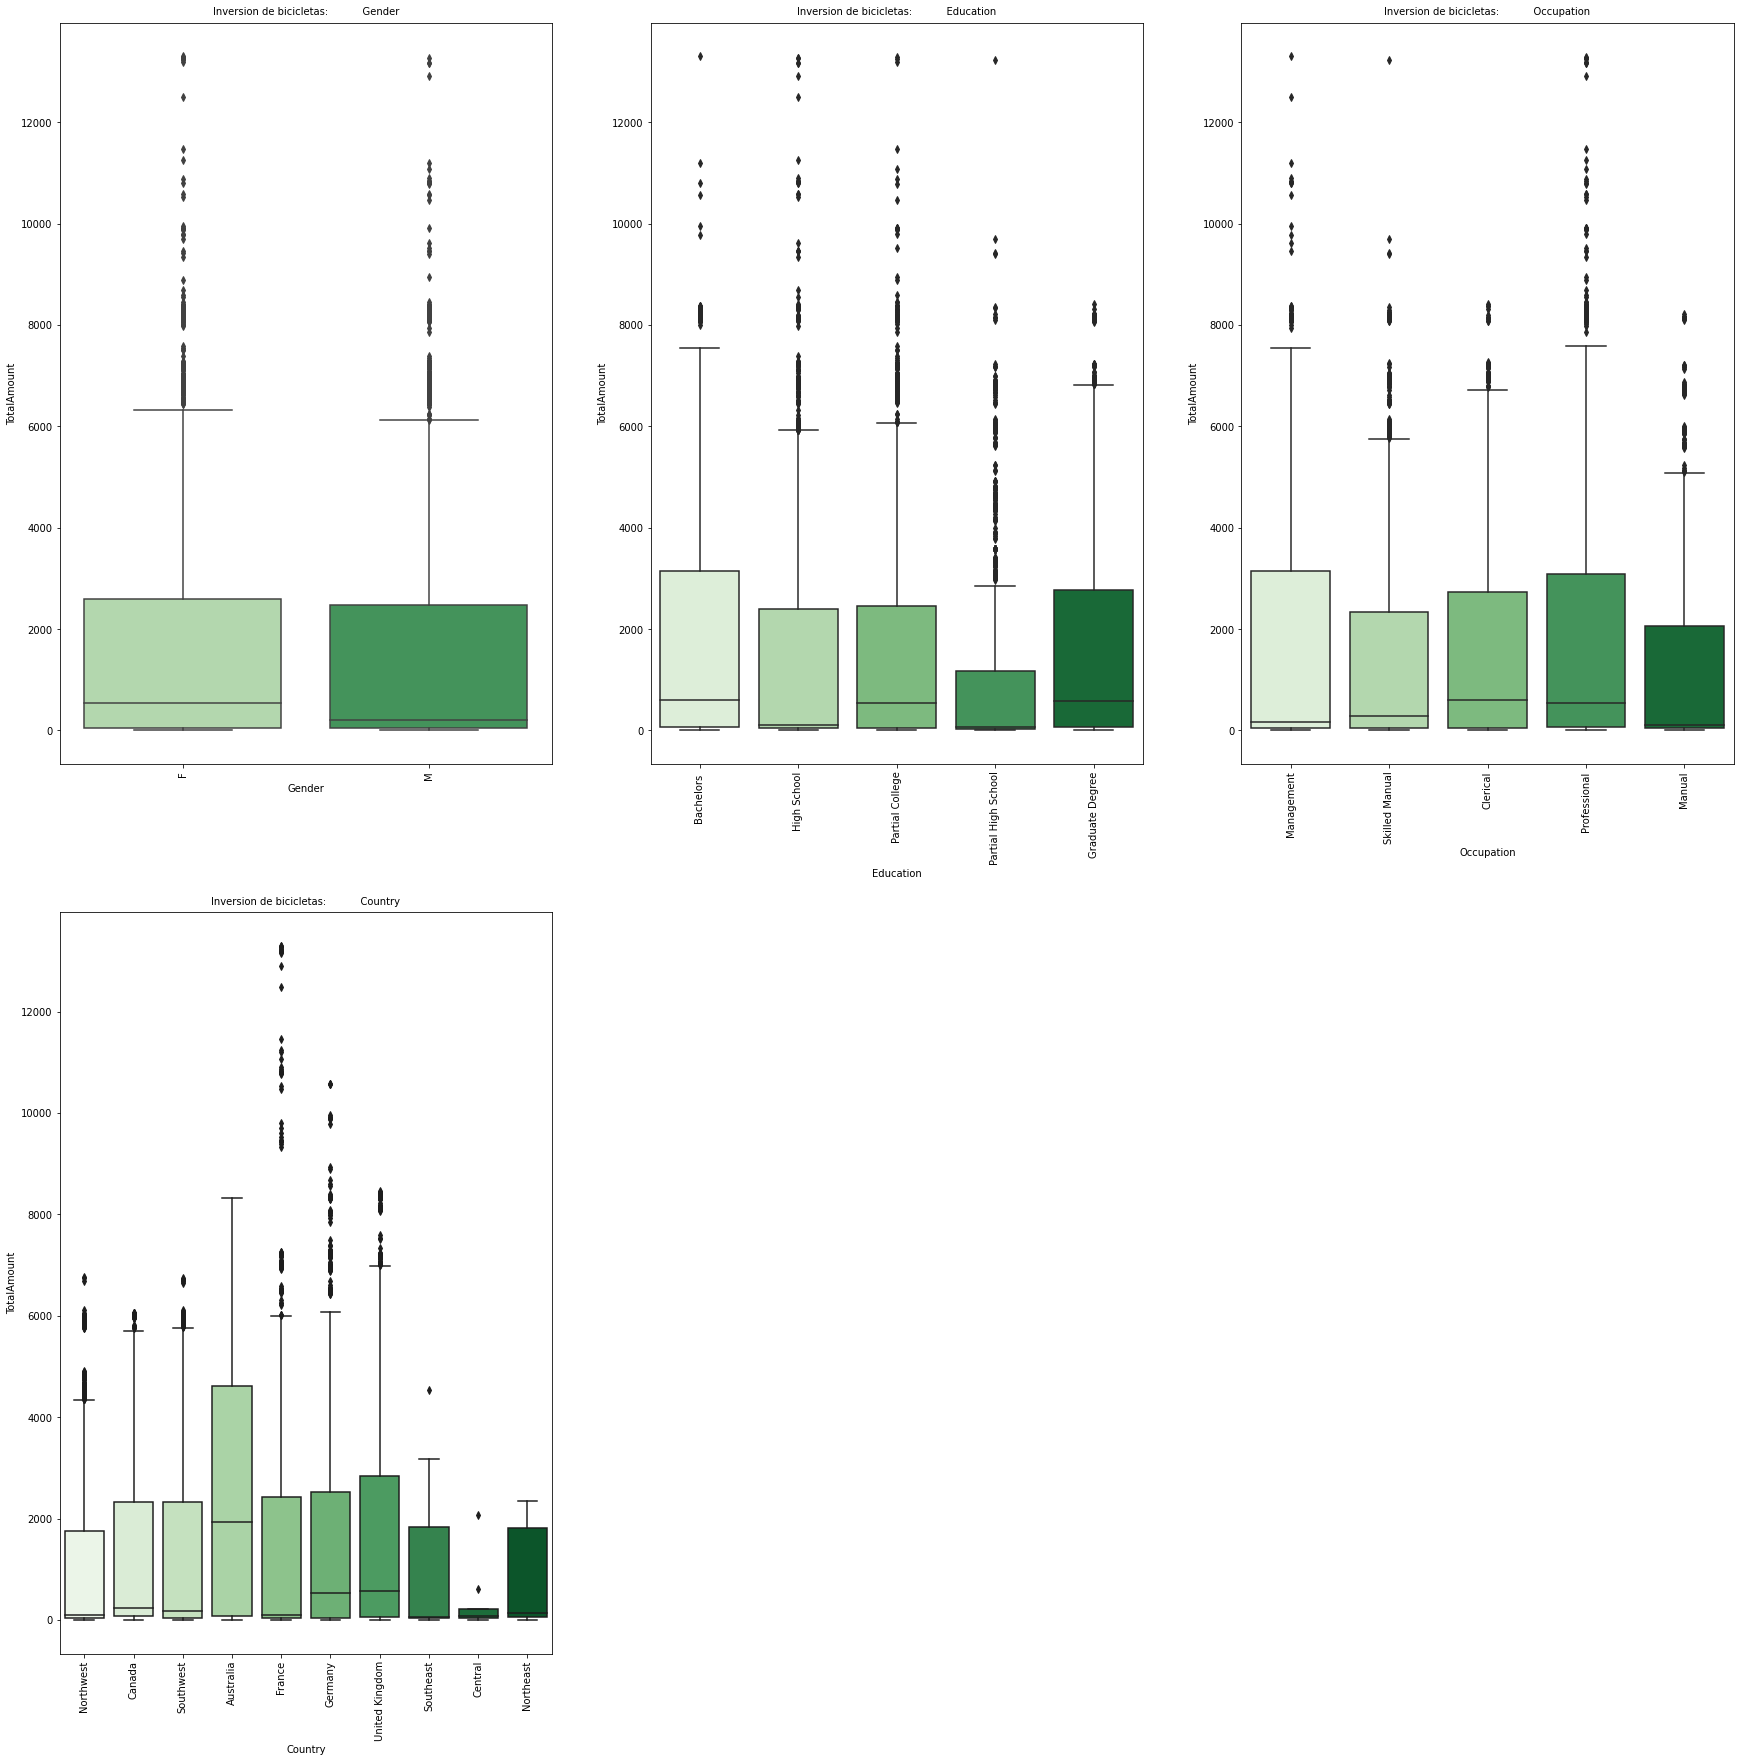

In [21]:
plt.figure(figsize=(30,30))
varstolook = ['Gender', 'Education','Occupation', 'Country']
for i,feature in enumerate(varstolook):
    plt.subplot(2,3,i+1)
    pl2 = sns.boxplot(x=feature, y = "TotalAmount", data = dfn, palette="Greens")
    pl2.set_xticklabels(pl2.get_xticklabels(), rotation=90, ha="center");
    plt.title("Inversion de bicicletas:           " + feature, fontsize=10, verticalalignment='bottom');

como podemos observar:


*   independientemente del Genero del cliente, estos pueden invertir en el articulo un rangp de $6000
*   el nivel educativo y la ocupacion del cleinte tambien influye en la compra de estos articulos entre mayor educacion y un mejor trabajo invierten mas dinero








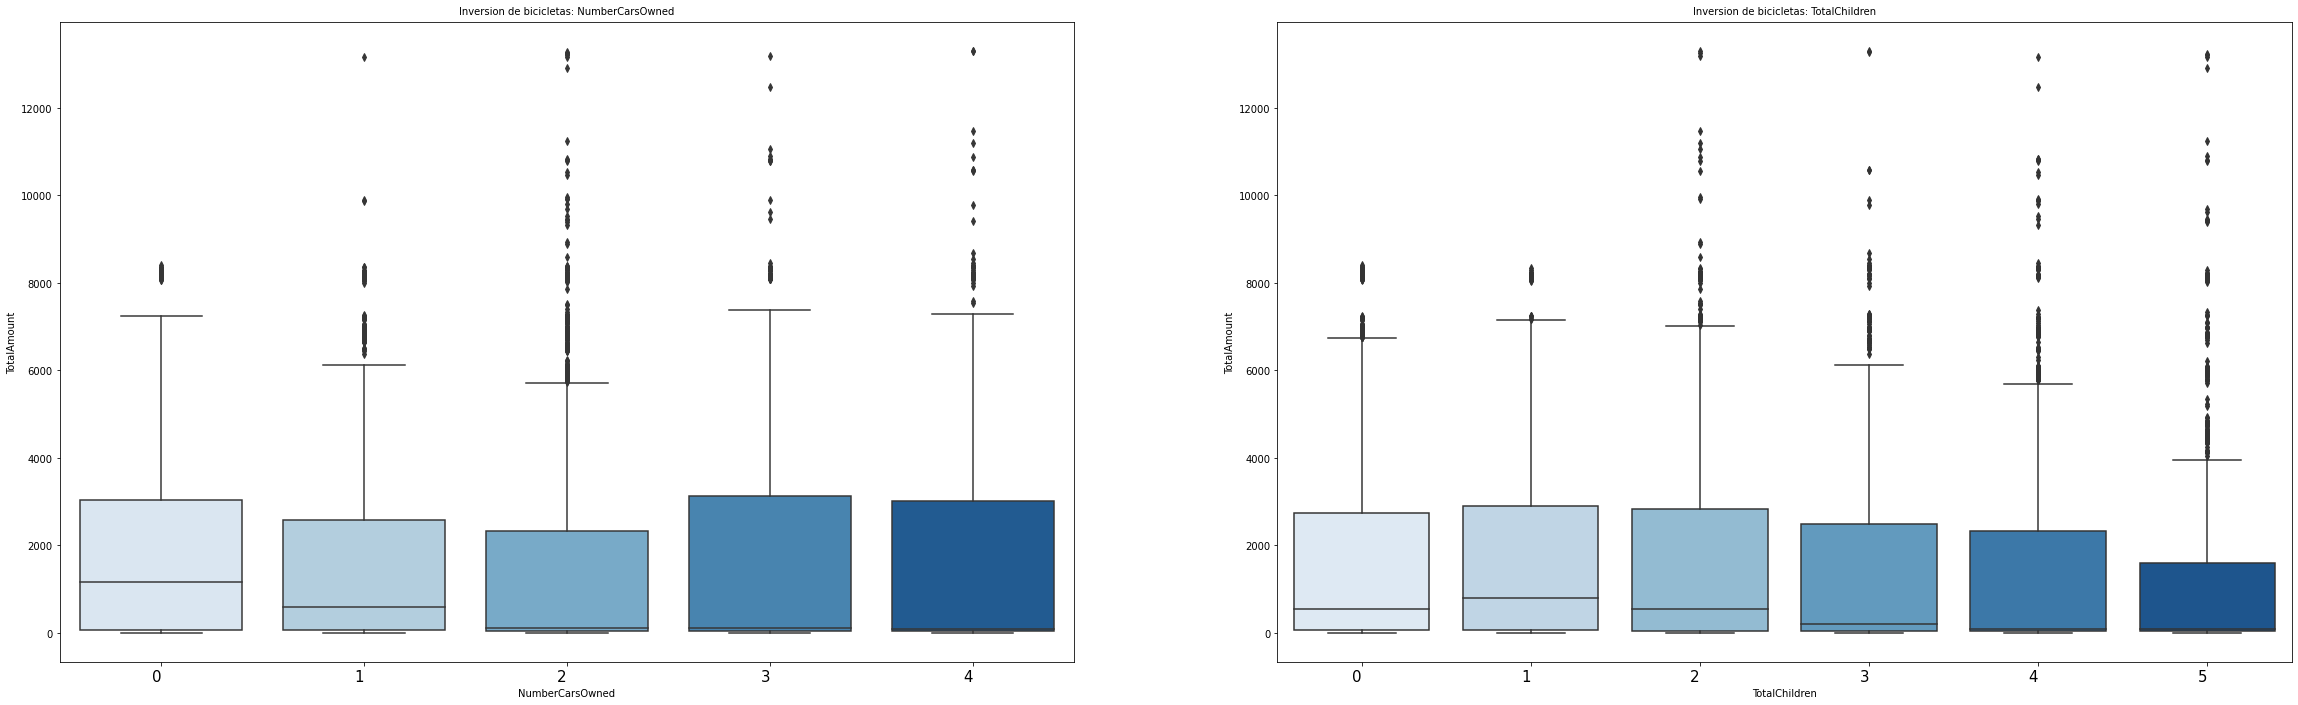

In [22]:
#las características categóricas numéricas
plt.figure(figsize=(40,40))
varstolook = ['NumberCarsOwned', 'TotalChildren']
for i,feature in enumerate(varstolook):
    plt.subplot(3,2,i+1)
    pl2 = sns.boxplot(x=feature, y = "TotalAmount", data = dfn, palette="Blues")
    pl2.set_xticklabels(pl2.get_xticklabels(), rotation=0, ha="right", fontsize=15);
    plt.title("Inversion de bicicletas: " + feature, fontsize=10, verticalalignment='bottom');

invierten mas en bicicletas las personas que no poseen carros, asi mismo que no tengan hijos o maximo tengan dos hijos 

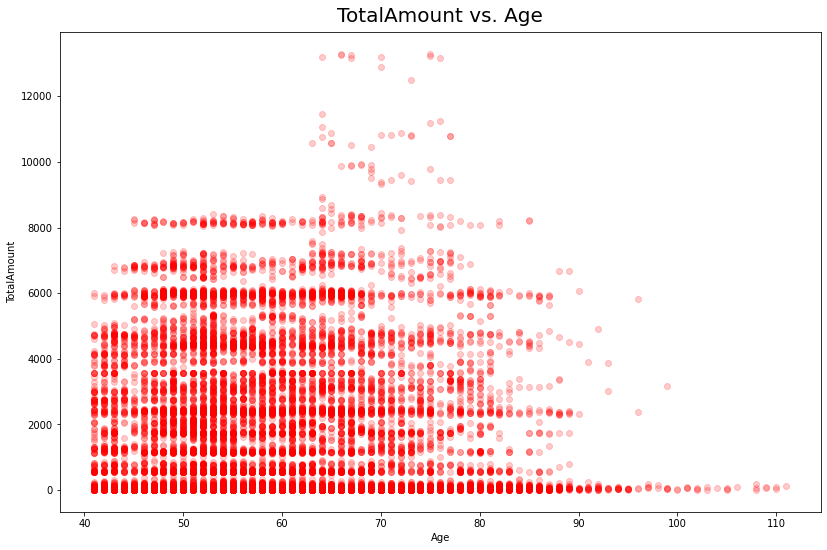

In [23]:
# numericos no categoricos
plt.figure(figsize=(30,30))
varstolook = ['Age']
for i,feature in enumerate(varstolook):
    plt.subplot(3,2,i+1)
    colvalues = dfn[feature]
    plt.scatter(colvalues.values, dfn.TotalAmount.values, alpha=0.20, edgecolor=None, color='red')
    plt.xlabel(feature)
    plt.ylabel('TotalAmount')
    plt.title("TotalAmount vs. " + feature, fontsize=20, verticalalignment='bottom');

las personas entre 45 y 67 años invierten mas en la compra de biciletas.

# **creamos el modelo de clasificación  KNN (vecinos mas cercanos) para determinar si un cliente comprara o no una bicicleta**

# **realizamos una estandarizacion de los datos**

In [24]:
dfn['Education'].value_counts()

Bachelors              5356
Partial College        5064
High School            3294
Graduate Degree        3189
Partial High School    1581
Name: Education, dtype: int64

In [25]:
dfn['Education'] = dfn['Education'].replace(['High School','Partial High School'],'High School')  
dfn['Education'] = dfn['Education'].replace(['Graduate Degree','Partial College'], 'University')

In [26]:
dfn['Education'].value_counts()

University     8253
Bachelors      5356
High School    4875
Name: Education, dtype: int64

In [27]:
dfn['Occupation'].value_counts()

Professional      5520
Skilled Manual    4577
Management        3075
Clerical          2928
Manual            2384
Name: Occupation, dtype: int64

In [28]:
dfn['Occupation'] = dfn['Occupation'].replace(['Professional' ,'Management'], 'Professional')
dfn['Occupation'] = dfn['Occupation'].replace(['Skilled Manual' ,'Manual'], 'Skilled Manual')

In [29]:
dfn['Occupation'].value_counts()

Professional      8595
Skilled Manual    6961
Clerical          2928
Name: Occupation, dtype: int64

In [30]:
dfn['Country'].value_counts()

Southwest         4450
Australia         3591
Northwest         3341
United Kingdom    1913
France            1810
Germany           1780
Canada            1571
Southeast           12
Central              8
Northeast            8
Name: Country, dtype: int64

In [31]:
dfn['Country'] = dfn['Country'].replace(['Southwest' ,'Northwest','Canada','Southeast','Central','Northeast'], 'North_America')
dfn['Country'] = dfn['Country'].replace(['Germany' ,'France','United Kingdom'], 'Europe')
dfn['Country'] = dfn['Country'].replace(['Australia'], 'Pacific')

In [32]:
dfn['Country'].value_counts()

North_America    9390
Europe           5503
Pacific          3591
Name: Country, dtype: int64

In [33]:
dfn.head()


,PersonID,Country,Gender,Education,Occupation,Age,MaritalStatus,TotalChildren,TotalAmount,BikePurchase,NumberCarsOwned
CustomerID,,,,,,,,,,,
11012,11663,North_America,F,Bachelors,Professional,53,M,2,81.26,0,2
11013,13873,North_America,M,Bachelors,Professional,53,M,2,113.96,0,3
11014,2868,North_America,F,Bachelors,Professional,53,S,3,138.45,0,3
11019,5132,North_America,M,High School,Skilled Manual,43,S,0,882.70,0,2
11023,4373,North_America,M,University,Skilled Manual,43,M,0,122.24,0,1


In [34]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18484 entries, 11012 to 29483
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PersonID         18484 non-null  int64  
 1   Country          18484 non-null  object 
 2   Gender           18484 non-null  object 
 3   Education        18484 non-null  object 
 4   Occupation       18484 non-null  object 
 5   Age              18484 non-null  int64  
 6   MaritalStatus    18484 non-null  object 
 7   TotalChildren    18484 non-null  int64  
 8   TotalAmount      18484 non-null  float64
 9   BikePurchase     18484 non-null  int64  
 10  NumberCarsOwned  18484 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 2.3+ MB


In [35]:
dfn.drop(['PersonID'], axis = 1, inplace = True)
dfn.head()

,Country,Gender,Education,Occupation,Age,MaritalStatus,TotalChildren,TotalAmount,BikePurchase,NumberCarsOwned
CustomerID,,,,,,,,,,
11012,North_America,F,Bachelors,Professional,53,M,2,81.26,0,2
11013,North_America,M,Bachelors,Professional,53,M,2,113.96,0,3
11014,North_America,F,Bachelors,Professional,53,S,3,138.45,0,3
11019,North_America,M,High School,Skilled Manual,43,S,0,882.70,0,2
11023,North_America,M,University,Skilled Manual,43,M,0,122.24,0,1


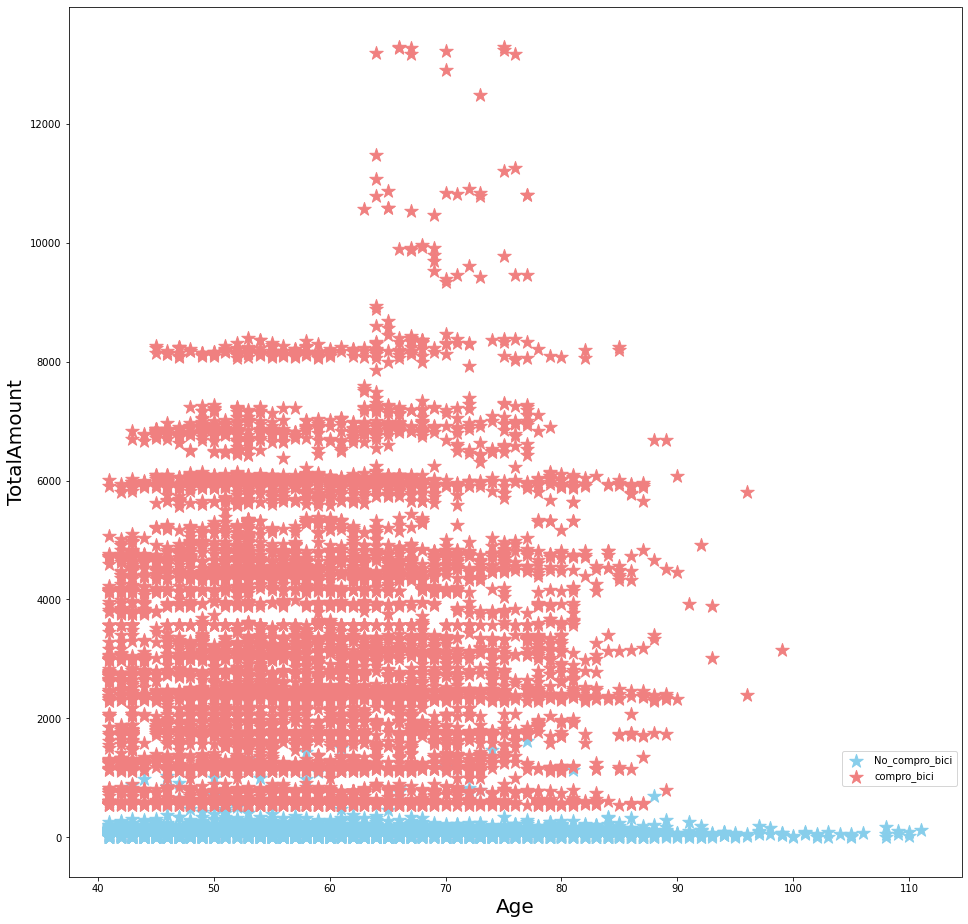

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

No_compro_bici = dfn[dfn["BikePurchase"]==0]
compro_bici = dfn[dfn["BikePurchase"]==1]

plt.figure(figsize=(16, 16))
plt.xlabel('Age', fontsize = 20.0)
plt.ylabel('TotalAmount', fontsize = 20.0)
plt.scatter(No_compro_bici["Age"], No_compro_bici["TotalAmount"], 
            label="No_compro_bici", marker="*", c="skyblue", s=200)
plt.scatter(compro_bici["Age"], compro_bici["TotalAmount"],
            label="compro_bici", marker="*", c="lightcoral", s=200)
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()

como podemos observar clientes entre 45 y 65 años invierten mas dinero en la compra de bicicletas, y tambien entre 65 y 75 años invierten en bicletas mas costosas

In [37]:
# codificando las variables categoricas no numericas 
dfn2 = pd.get_dummies(dfn, columns=['Education', 'Occupation','Country'], drop_first=False)
dfn2.replace({'Gender': {"M":0, "F":1},
             'MaritalStatus': {"S":0, "M":1}}, inplace=True)

In [38]:
dfn2

,Gender,Age,MaritalStatus,TotalChildren,TotalAmount,BikePurchase,NumberCarsOwned,Education_Bachelors,Education_High School,Education_University,Occupation_Clerical,Occupation_Professional,Occupation_Skilled Manual,Country_Europe,Country_North_America,Country_Pacific
CustomerID,,,,,,,,,,,,,,,,
11012,1,53,1,2,81.2600,0,2,1,0,0,0,1,0,0,1,0
11013,0,53,1,2,113.9600,0,3,1,0,0,0,1,0,0,1,0
11014,1,53,0,3,138.4500,0,3,1,0,0,0,1,0,0,1,0
11019,0,43,0,0,882.7000,0,2,0,1,0,0,0,1,0,1,0
11023,0,43,1,0,122.2400,0,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29479,0,63,1,1,2049.0982,1,0,0,0,1,1,0,0,1,0,0
29480,1,61,0,3,2442.0300,1,0,0,0,1,1,0,0,1,0,0
29481,0,61,0,3,3374.9900,1,0,0,0,1,1,0,0,1,0,0


In [39]:
dfn2[['NumberCarsOwned','Age','TotalChildren','TotalAmount']] = StandardScaler().fit_transform(dfn2[['NumberCarsOwned','Age','TotalChildren','TotalAmount']])
dfn2

,Gender,Age,MaritalStatus,TotalChildren,TotalAmount,BikePurchase,NumberCarsOwned,Education_Bachelors,Education_High School,Education_University,Occupation_Clerical,Occupation_Professional,Occupation_Skilled Manual,Country_Europe,Country_North_America,Country_Pacific
CustomerID,,,,,,,,,,,,,,,,
11012,1,-0.570727,1,0.096534,-0.709485,0,0.436851,1,0,0,0,1,0,0,1,0
11013,0,-0.570727,1,0.096534,-0.694091,0,1.315305,1,0,0,0,1,0,0,1,0
11014,1,-0.570727,0,0.716741,-0.682561,0,1.315305,1,0,0,0,1,0,0,1,0
11019,0,-1.459704,0,-1.143880,-0.332190,0,0.436851,0,1,0,0,0,1,0,1,0
11023,0,-1.459704,1,-1.143880,-0.690193,0,-0.441603,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29479,0,0.318250,1,-0.523673,0.216917,1,-1.320058,0,0,1,1,0,0,1,0,0
29480,1,0.140455,0,0.716741,0.401898,1,-1.320058,0,0,1,1,0,0,1,0,0
29481,0,0.140455,0,0.716741,0.841108,1,-1.320058,0,0,1,1,0,0,1,0,0


# **separación de los datos: entrenamiento 80% y prueba 20%**

In [40]:
X = dfn2.drop(['BikePurchase'], axis=1)
X

,Gender,Age,MaritalStatus,TotalChildren,TotalAmount,NumberCarsOwned,Education_Bachelors,Education_High School,Education_University,Occupation_Clerical,Occupation_Professional,Occupation_Skilled Manual,Country_Europe,Country_North_America,Country_Pacific
CustomerID,,,,,,,,,,,,,,,
11012,1,-0.570727,1,0.096534,-0.709485,0.436851,1,0,0,0,1,0,0,1,0
11013,0,-0.570727,1,0.096534,-0.694091,1.315305,1,0,0,0,1,0,0,1,0
11014,1,-0.570727,0,0.716741,-0.682561,1.315305,1,0,0,0,1,0,0,1,0
11019,0,-1.459704,0,-1.143880,-0.332190,0.436851,0,1,0,0,0,1,0,1,0
11023,0,-1.459704,1,-1.143880,-0.690193,-0.441603,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29479,0,0.318250,1,-0.523673,0.216917,-1.320058,0,0,1,1,0,0,1,0,0
29480,1,0.140455,0,0.716741,0.401898,-1.320058,0,0,1,1,0,0,1,0,0
29481,0,0.140455,0,0.716741,0.841108,-1.320058,0,0,1,1,0,0,1,0,0


In [41]:
y = dfn2[['BikePurchase']].values.ravel()
y

array([0, 0, 0, ..., 1, 1, 1])

In [42]:
# Split Train, Validation y Test Data
X_rest, X_test, y_rest, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train, X_vali, y_train, y_vali = train_test_split(X_rest, y_rest, test_size=0.20, random_state=0)

In [43]:
print(X_train.shape)
print(X_vali.shape)
print(X_test.shape)
print(y_test.shape)

(11829, 15)
(2958, 15)
(3697, 15)
(3697,)


# **Entrena el modelo para predecir si un cliente comprara o no: KNN (vecinos mas cercanos)** 

In [44]:
X_train

,Gender,Age,MaritalStatus,TotalChildren,TotalAmount,NumberCarsOwned,Education_Bachelors,Education_High School,Education_University,Occupation_Clerical,Occupation_Professional,Occupation_Skilled Manual,Country_Europe,Country_North_America,Country_Pacific
CustomerID,,,,,,,,,,,,,,,
15226,1,-0.126238,0,-1.143880,1.319609,0.436851,1,0,0,0,1,0,0,0,1
21101,1,-1.548602,0,0.716741,-0.732543,0.436851,0,0,1,1,0,0,1,0,0
12773,1,0.584943,1,-0.523673,2.033694,-0.441603,0,0,1,1,0,0,0,1,0
26006,0,0.229353,1,1.336949,-0.735975,-1.320058,1,0,0,0,1,0,0,1,0
19196,1,-0.748522,0,0.096534,1.444989,-0.441603,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12879,0,-0.926318,1,-1.143880,-0.730340,-1.320058,0,0,1,0,0,1,0,1,0
14505,0,2.096205,1,0.096534,-0.718571,2.193760,1,0,0,0,1,0,0,1,0
16625,0,-0.926318,1,-1.143880,-0.709226,0.436851,0,1,0,0,1,0,0,0,1


In [45]:
y_train

array([1, 0, 1, ..., 0, 0, 0])

In [46]:
classifer=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)


In [47]:
classifer.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
y_pred =classifer.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1762,   57],
       [ 161, 1717]])

como podemos observar de los 3697 elementos de prueba que son utilizados para el entrenamiento del modelo de KNN, en la matriz de confusion se observa que 3479 elementos fueron clasificados correctamente, sin embargo se presentaron 218 elementos clasificados como falsos negativos.

por lo tanto la eficiencia del modelo esta alrededor del 94.10 %, siendo aceptable.

# **Comparamos el modelo anterior usando la métrica precisión**

In [51]:
#ahora bien vamos a trabajar com la metrica de presicion del modelo para conocer la eficiencia del modelo

In [52]:
classifer.predict(X)[:5]

array([0, 0, 0, 1, 0])

In [53]:
from sklearn.metrics import precision_score
precision_score(y, classifer.predict(X))

0.9752860411899313

como podemos observar con la metrica de presicion la eficiencia del modelo es de 97.52% siendo aceptable, donde nos indica que es probabale que el cliente compre una bicicleta

# **realizamos una prueba**

In [54]:
X_test1= X_test[:10]
X_test1

,Gender,Age,MaritalStatus,TotalChildren,TotalAmount,NumberCarsOwned,Education_Bachelors,Education_High School,Education_University,Occupation_Clerical,Occupation_Professional,Occupation_Skilled Manual,Country_Europe,Country_North_America,Country_Pacific
CustomerID,,,,,,,,,,,,,,,
21593,0,-0.659624,0,0.096534,-0.203773,-1.320058,1,0,0,0,0,1,0,1,0
14766,0,-0.570727,0,-0.523673,-0.745390,-1.320058,0,0,1,0,0,1,1,0,0
25550,1,1.829511,1,-0.523673,-0.477056,-1.320058,0,0,1,0,0,1,1,0,0
12525,1,-1.193011,1,-0.523673,-0.691256,-1.320058,1,0,0,0,0,1,1,0,0
14031,0,0.584943,1,0.096534,2.530908,0.436851,0,1,0,0,0,1,0,0,1
16416,0,-0.215136,0,0.096534,1.592784,-1.320058,0,0,1,0,0,1,1,0,0
13215,1,1.385023,1,1.957156,-0.713868,1.315305,1,0,0,0,1,0,0,1,0
22608,0,-0.659624,0,0.096534,0.073742,-1.320058,0,1,0,0,0,1,1,0,0
24372,1,-0.304034,0,0.096534,0.832188,-0.441603,1,0,0,0,1,0,0,0,1


**tomamos 10 datos al azar **

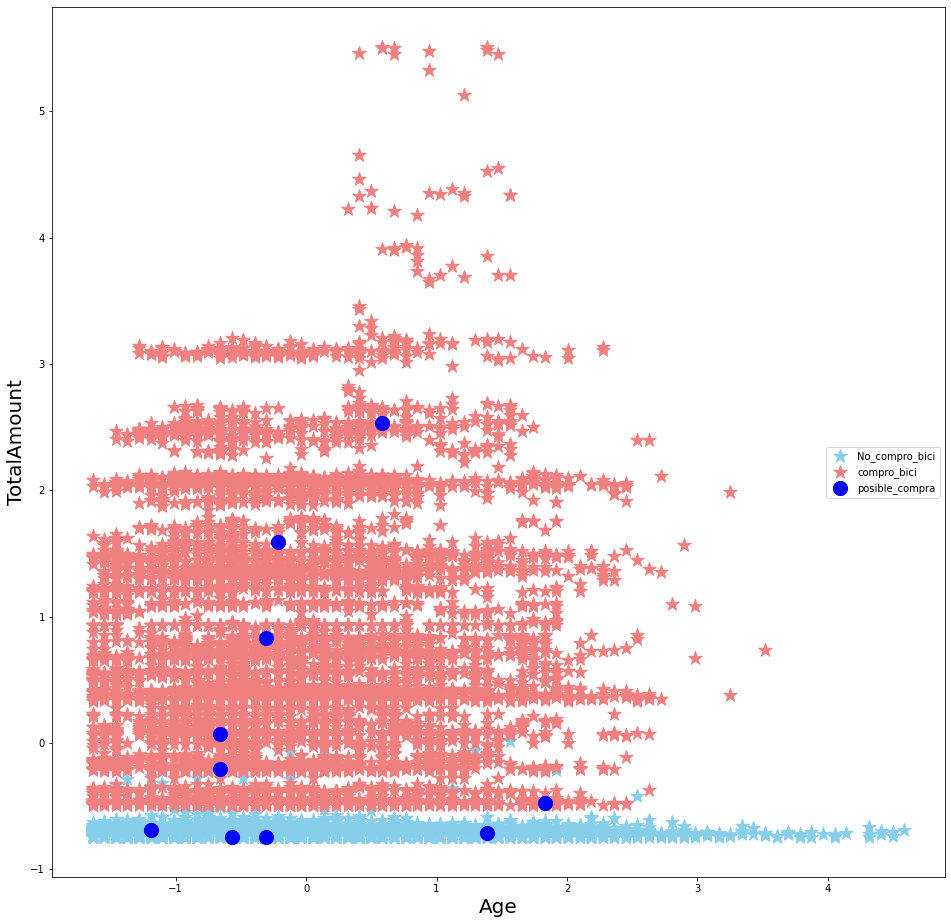

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

No_compro_bici = dfn2[dfn2["BikePurchase"]==0]
compro_bici = dfn2[dfn2["BikePurchase"]==1]

plt.figure(figsize=(16, 16))
plt.xlabel('Age', fontsize = 20.0)
plt.ylabel('TotalAmount', fontsize = 20.0)
plt.scatter(No_compro_bici["Age"], No_compro_bici["TotalAmount"], 
            label="No_compro_bici", marker="*", c="skyblue", s=200)
plt.scatter(compro_bici["Age"], compro_bici["TotalAmount"],
            label="compro_bici", marker="*", c="lightcoral", s=200)

plt.scatter(X_test1["Age"], X_test1["TotalAmount"],
            label="posible_compra", marker="o", c="blue", s=200)

plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

como podemos observar de una prueba de 10 clientes al azar 6 es seguro que compraran el articulo ofertado, y 4 definitivamente no invertiran en el articulo ofertado por la compañia.